In [225]:
from google.colab import files  # из библиотеки google.colab импортируем класс files
import pandas as pd             # для вывода данных
from sklearn.preprocessing import StandardScaler    # импортируем класс StandardScaler для нормализации данных

In [2]:
uploaded = files.upload()       # загружаем файл с данными с компьютера

Saving milk_dataset_3.csv to milk_dataset_3.csv


In [226]:
#train = pd.read_csv('/content/milk_dataset_1.csv')    # применим функцию read_csv() и посмотрим на первые
                                                      # три записи файла train.csv
train = pd.read_csv('/content/milk_dataset_3.csv')
train.head(3)

,Proteins (g),Fats (g),Carbohydrates (g),Calories,Days until the end of the shelf life,Weight (kg),Height (cm),Age,Physique,Individual intolerance,Usefulness of the product for humans
0,2.9,2.5,4.7,53.0,10,70,175,25,2,1,0
1,2.9,2.5,4.7,53.0,9,58,163,32,1,1,0
2,2.9,2.5,4.7,53.0,8,85,187,40,3,1,0


In [227]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6808 entries, 0 to 6807
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Proteins (g)                          6808 non-null   float64
 1   Fats (g)                              6808 non-null   float64
 2   Carbohydrates (g)                     6808 non-null   float64
 3   Calories                              6808 non-null   float64
 4   Days until the end of the shelf life  6808 non-null   int64  
 5   Weight (kg)                           6808 non-null   int64  
 6   Height (cm)                           6808 non-null   int64  
 7   Age                                   6808 non-null   int64  
 8   Physique                              6808 non-null   int64  
 9   Individual intolerance                6808 non-null   int64  
 10  Usefulness of the product for humans  6808 non-null   int64  
dtypes: float64(4), in

In [228]:
# разбиваем телосложение на категории "1", "2", "3" и "4", затем отбрасываем столбец "1", т.к. он избыточен
#physique = pd.get_dummies(train['Physique'], drop_first = True)
physique = pd.get_dummies(train['Physique'])

In [229]:
# проводим конкатенацию нашего основного набора данных с полученным ранее набором категорий телосложения
train = pd.concat([train, physique], axis = 1)
train

,Proteins (g),Fats (g),Carbohydrates (g),Calories,Days until the end of the shelf life,Weight (kg),Height (cm),Age,Physique,Individual intolerance,Usefulness of the product for humans,1,2,3,4
0,2.9,2.5,4.7,53.0,10,70,175,25,2,1,0,False,True,False,False
1,2.9,2.5,4.7,53.0,9,58,163,32,1,1,0,True,False,False,False
2,2.9,2.5,4.7,53.0,8,85,187,40,3,1,0,False,False,True,False
3,2.9,2.5,4.7,53.0,7,62,158,19,3,1,0,False,False,True,False
4,2.9,2.5,4.7,53.0,6,90,195,45,2,1,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,3.1,4.5,4.8,72.0,16,65,170,80,3,1,0,False,False,True,False
6804,3.1,4.5,4.8,72.0,17,65,170,80,3,1,0,False,False,True,False
6805,3.1,4.5,4.8,72.0,18,65,170,80,3,1,0,False,False,True,False
6806,3.1,4.5,4.8,72.0,19,65,170,80,3,1,0,False,False,True,False


In [230]:
train.drop(['Physique'], axis = 1, inplace = True)      # избавляемся от уже ненужного столбца 'Physique'
train.head(3)                                           # показываем получившийся набор данных

,Proteins (g),Fats (g),Carbohydrates (g),Calories,Days until the end of the shelf life,Weight (kg),Height (cm),Age,Individual intolerance,Usefulness of the product for humans,1,2,3,4
0,2.9,2.5,4.7,53.0,10,70,175,25,1,0,False,True,False,False
1,2.9,2.5,4.7,53.0,9,58,163,32,1,0,True,False,False,False
2,2.9,2.5,4.7,53.0,8,85,187,40,1,0,False,False,True,False


Оставшиеся переменные представляют собой либо количественные, либо категориальные признаки, выражены через 0 и 1.

Для избежания ситуации, в которой модель неоправданно придает большее значение признаку с большей числовой характеристикой, получая соответственно ошибочный результат, проведем нормализацию данных и приведем количественные переменные к одному масштабу.

In [231]:
scaler = StandardScaler()                                            # создадим объект класса StandardScaler
cols_to_scale = ['Proteins (g)', 'Fats (g)', 'Carbohydrates (g)',
                 'Calories', 'Days until the end of the shelf life',
                 'Weight (kg)', 'Height (cm)', 'Age']                # выберем те столбцы, которые мы хотим масштабировать
scaler.fit(train[cols_to_scale])                          # рассчитаем среднее арифметическое и СКО для масштабирования данных
train[cols_to_scale] = scaler.transform(train[cols_to_scale])        # нормализуем данные

train                                                                # посмотрим на результат

,Proteins (g),Fats (g),Carbohydrates (g),Calories,Days until the end of the shelf life,Weight (kg),Height (cm),Age,Individual intolerance,Usefulness of the product for humans,1,2,3,4
0,0.488910,0.075398,-1.415305,0.060961,0.170682,-0.353712,0.251491,-0.990225,1,0,False,True,False,False
1,0.488910,0.075398,-1.415305,0.060961,0.019320,-0.855882,-0.608274,-0.689269,1,0,True,False,False,False
2,0.488910,0.075398,-1.415305,0.060961,-0.132041,0.274000,1.111257,-0.345320,1,0,False,False,True,False
3,0.488910,0.075398,-1.415305,0.060961,-0.283402,-0.688492,-0.966510,-1.248187,1,0,False,False,True,False
4,0.488910,0.075398,-1.415305,0.060961,-0.434763,0.483238,1.684434,-0.130351,1,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,0.906748,1.186937,0.706562,1.194747,1.078849,-0.562949,-0.106745,1.374427,1,0,False,False,True,False
6804,0.906748,1.186937,0.706562,1.194747,1.230210,-0.562949,-0.106745,1.374427,1,0,False,False,True,False
6805,0.906748,1.186937,0.706562,1.194747,1.381571,-0.562949,-0.106745,1.374427,1,0,False,False,True,False
6806,0.906748,1.186937,0.706562,1.194747,1.532932,-0.562949,-0.106745,1.374427,1,0,False,False,True,False


In [232]:
train.columns = train.columns.map(str)               # приведем все названия колонок к строковому формату

In [233]:
# поместим в X_all все кроме столбца 'Usefulness of the product for humans', т.е. нашего target
X_all = train.drop('Usefulness of the product for humans', axis = 1)
# столбец 'Usefulness of the product for humans' станет нашей целевой переменной
y_all = train['Usefulness of the product for humans']

In [234]:
X_all.head(3)

,Proteins (g),Fats (g),Carbohydrates (g),Calories,Days until the end of the shelf life,Weight (kg),Height (cm),Age,Individual intolerance,1,2,3,4
0,0.48891,0.075398,-1.415305,0.060961,0.170682,-0.353712,0.251491,-0.990225,1,False,True,False,False
1,0.48891,0.075398,-1.415305,0.060961,0.019320,-0.855882,-0.608274,-0.689269,1,True,False,False,False
2,0.48891,0.075398,-1.415305,0.060961,-0.132041,0.274000,1.111257,-0.345320,1,False,False,True,False


In [235]:
X=X_all.values        # для большего удобства приведем наши данные к типу numpy.ndarray
y=y_all.values
X

array([[0.4889097262561655, 0.07539787165035067, -1.415304836849165, ...,
        True, False, False],
       [0.4889097262561655, 0.07539787165035067, -1.415304836849165, ...,
        False, False, False],
       [0.4889097262561655, 0.07539787165035067, -1.415304836849165, ...,
        False, True, False],
       ...,
       [0.906747714751267, 1.1869368716407969, 0.7065615646635252, ...,
        False, True, False],
       [0.906747714751267, 1.1869368716407969, 0.7065615646635252, ...,
        False, True, False],
       [0.906747714751267, 1.1869368716407969, 0.7065615646635252, ...,
        False, True, False]], dtype=object)

# Обучение модели

В итоге мы привели данные к необходимому виду, далее можем разбивать нашу выборку на тренировочную и тестовую части и проризводить обучение модели методом градиентного бустинга.

In [236]:
import numpy as np                                        # для математических вычислений
import sklearn                           # воспользуемся библиотекой, в которой уже разработан метод градиентного бустинга
from sklearn.model_selection import train_test_split      # для разделения наших данных на тестовую и тренировочную выборки
from sklearn.ensemble import GradientBoostingRegressor    # метод градиентного бустинга

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=53)       # формирование наших выборок

In [239]:
np.random.seed(53)
#sklearn_model = GradientBoostingRegressor(n_estimators=100, learning_rate=1, min_samples_split=15, max_depth=15)
sklearn_model = GradientBoostingRegressor()
sklearn_model.fit(X_train, y_train)       # применение градиентного бустинга и обучение модели на тренировочной выборке

GradientBoostingRegressor()

In [240]:
# модель обученав => посмотрим, как хорошо она предскажет данные, на которых обучалась
y_pred_train = sklearn_model.predict(X_train)

In [241]:
i=456
y_pred_train1 = sklearn_model.predict(X_train[i-1:i][:])
print(y_train[i-1:i],y_pred_train1)
print(X_train[i-1:i][:])

[0] [0.14481315]
[[0.906747714751267 1.1869368716407969 0.7065615646635252
  1.1947472683725402 0.9274874983716553 0.48323756301034304
  1.3261981454763165 1.374426762415063 0 False True False False]]


In [242]:
# для отрисовки графиков и более наглядного представления полученных результатов
import matplotlib.pyplot as plt

def plot_two_ys(y_pred, y_test, y_pred_name, y_test_name):
  plt.figure(figsize=(15, 10))
  plt.plot(y_pred[500:1000], label=y_pred_name)
  plt.plot(y_test[500:1000], label=y_test_name)
  plt.legend(fontsize=20)
  plt.xlabel('Observation number', fontsize=20)
  plt.ylabel('Usefulness of the product for humans', fontsize=20)
  plt.show()

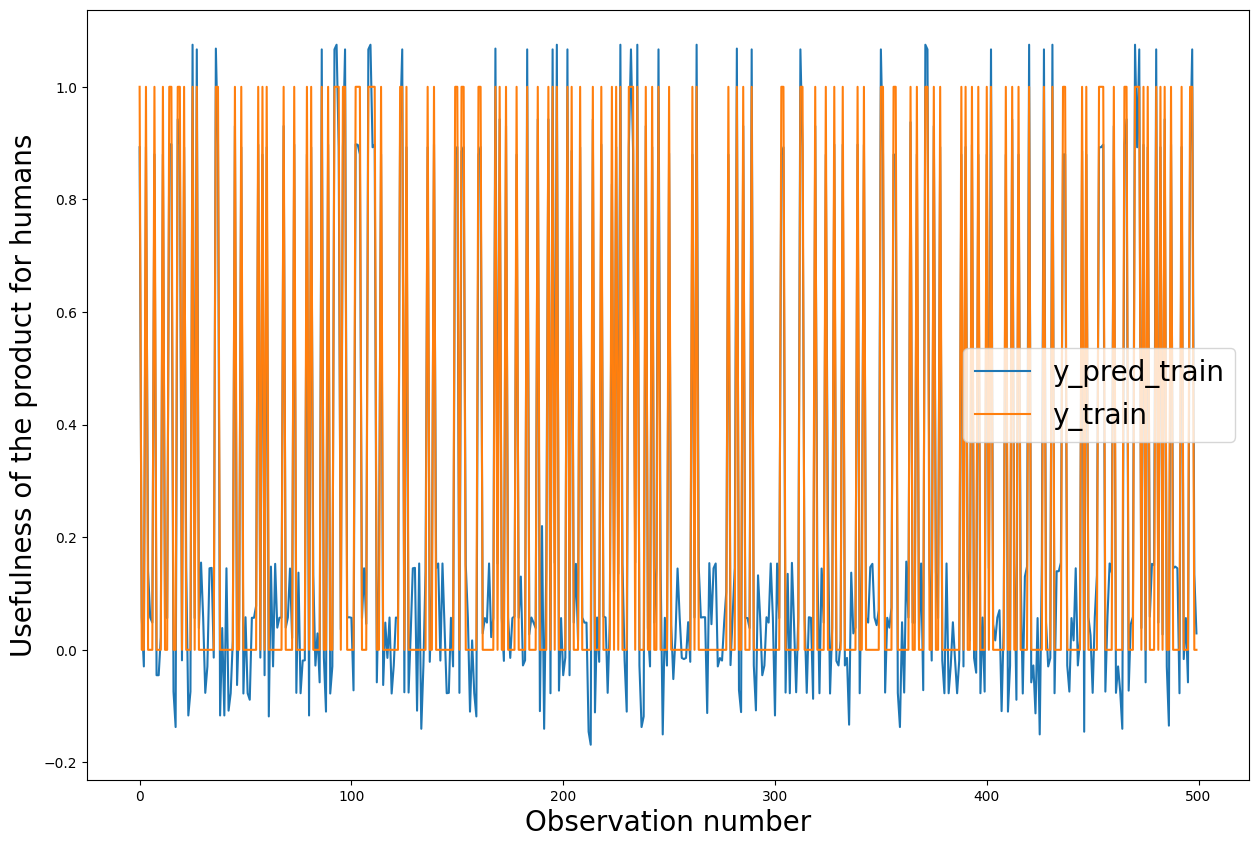

In [243]:
plot_two_ys(y_pred_train,  y_train, "y_pred_train", "y_train")

Видим, что обучение модели прошло успешно и она себя отлично показывает на тренировочной выборке. Далее посмотрим на результаты тестовой выборки.

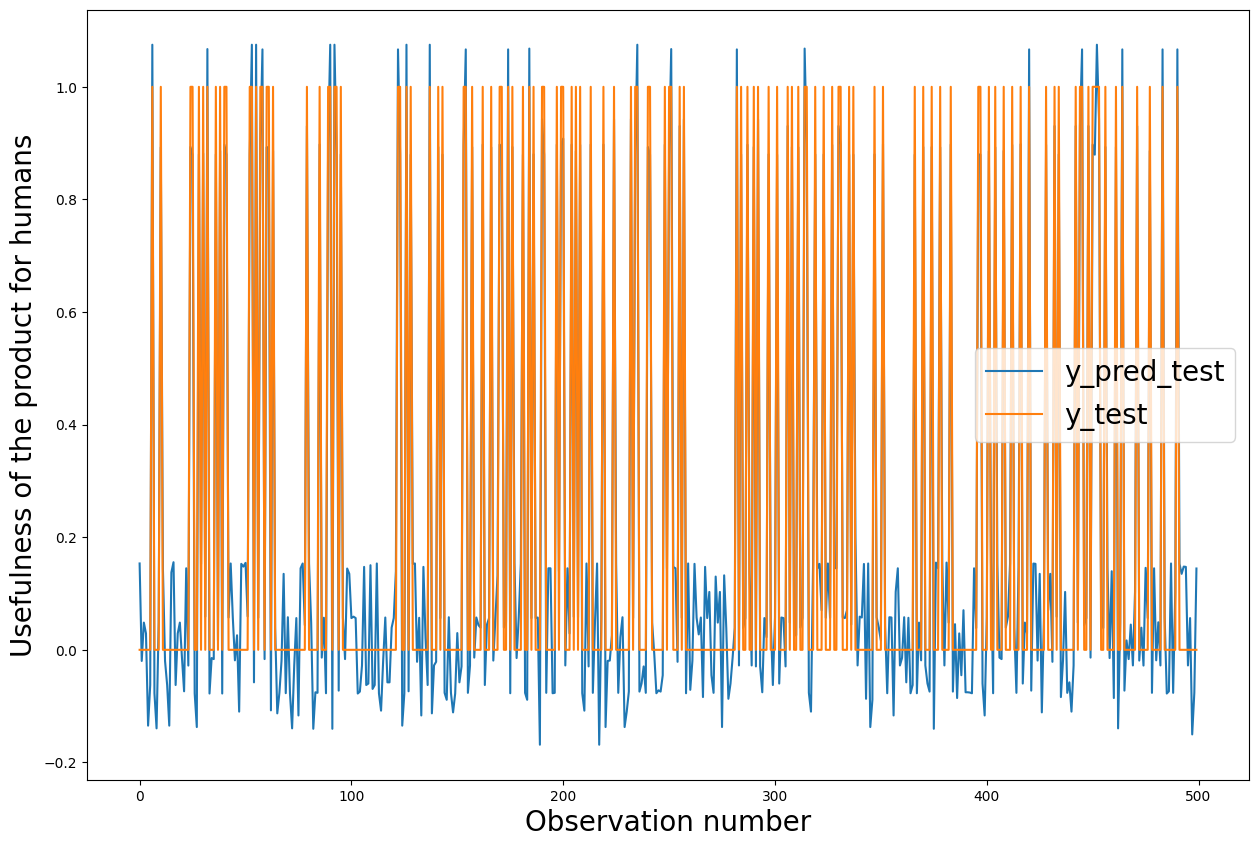

In [244]:
y_pred_test = sklearn_model.predict(X_test)
plot_two_ys(y_pred_test,  y_test, "y_pred_test", "y_test")

Видим, что модель работает достаточно точно.

# Получение конкретных значений

In [245]:
!pip install pytesseract                # т.к. pytesseract нет в google colab
!apt install tesseract-ocr-rus          # для русского языка

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-rus is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [246]:
import pytesseract                    # для чтения текста с картинок
#from PIL import Image
import cv2                            # для работы с картинками
from google.colab.patches import cv2_imshow

config = r'--oem 3 --psm 6'           # для наибольшей точности считывания текста с картинок
pytesseract.pytesseract.tesseract_cmd = ( r'/usr/bin/tesseract')

In [201]:
uploaded1 = files.upload()

Saving milk1_6.jpg to milk1_6 (1).jpg


##Функции для работы с картинкой молока

In [247]:
import re                           # библиотека для регулярных выражений

# предобработка текста с картинки - вычленение информации о белках, жирах, углеводах и калорийности
def text_preprocessing(str):
  arr_info=[0,0,0,0]

  match = re.search(r'\bбелк[аио]?в?\s?[—-]?\s?[0123456789]+[,.\s]?[0123456789]', str, re.IGNORECASE) # выделяем белки
  if match:
    tmp_str_match=re.search(r'\b[0123456789]+[,.\s]?[0123456789]', match[0], re.IGNORECASE)
    tmp_str=tmp_str_match[0].replace(",",".")
    arr_info[0]=float(tmp_str)

  match = re.search(r'\bжир[аыов]?\s?[—-]?\s?[0123456789]+[,.\s]?[0123456789]', str, re.IGNORECASE)  # выделяем жиры
  if match:
    tmp_str_match=re.search(r'\b[0123456789]+[,.\s]?[0123456789]', match[0], re.IGNORECASE)
    tmp_str=tmp_str_match[0].replace(",",".")
    arr_info[1]=float(tmp_str)

  match = re.search(r'\b[жи]?р[аыов]?\s?[—-]?\s?[0123456789]+[,.\s]?[0123456789]', str, re.IGNORECASE) # жиры
  if match:
    tmp_str_match=re.search(r'\b[0123456789]+[,.\s]?[0123456789]', match[0], re.IGNORECASE)
    tmp_str=tmp_str_match[0].replace(",",".")
    arr_info[1]=float(tmp_str)

  match = re.search(r'\bуглевод[ыо]?в?\s?[—-]?\s?[0123456789]+[,.\s]?[0123456789]', str, re.IGNORECASE) # углеводы
  if match:
    tmp_str_match=re.search(r'\b[0123456789]+[,.\s]?[0123456789]', match[0], re.IGNORECASE)
    tmp_str=tmp_str_match[0].replace(",",".")
    arr_info[2]=float(tmp_str)

  match = re.search(r'[\d]+(.[\d]+)?\sккал', str, re.IGNORECASE)                                       # калорийность
  if match:
    tmp_str_match=re.search(r'[\d]+(.[\d]+)?', match[0], re.IGNORECASE)
    tmp_str=tmp_str_match[0].replace(",",".")
    arr_info[3]=float(tmp_str)

  return arr_info

In [266]:
# предобработка текста с фотографии продукта. Фотография рассматривается в rgb, gray и white-black
# цветах для достижения наибольшей точности
def image_recognition(img_name):
  img_info=[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
  img=[0,0,0]
  img_text=["","",""]
  img_info_res=[0, 0, 0, 0]

  img[0]=cv2.imread(img_name)
  img[1]=cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
  (thresh, img[2]) = cv2.threshold(img[1], 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

  # наглядное представление, какие картинки мы получаем
  #numpy_horizontal_concat = np.concatenate((img[0], img[0]), axis=1)
  #cv2_imshow(numpy_horizontal_concat)
  #numpy_horizontal_concat = np.concatenate((img[1], img[2]), axis=1)
  #cv2_imshow(numpy_horizontal_concat)

  for i in range(3):
    img_text[i]=pytesseract.image_to_string(img[i], lang='rus', config=config)      # получаем текст с картинки
    # получаем информацию по данной фотографии белки-жиры-углеводы-калорийность
    img_info[i]=text_preprocessing(img_text[i])
    #print(img_text[i])

    for j in range(4):
      if img_info[i][j]!=0:
        # итоговые значения собираются со всех трех вариантов картинки
        img_info_res[j]=img_info[i][j]

  return img_info_res


##Функции для работы с картинкой даты

In [249]:
#Находит в строке даты числа
def date_preprocessing(str):
  arr_info=[0,0,0]

  if(len(str)==0):
    print("строка пуста")
    return arr_info

  arr_info_tmp1=str.replace('.', ' ')
  arr_info_tmp1=arr_info_tmp1.replace('e', '6')
  arr_info_tmp1=' '.join(arr_info_tmp1.split())
  arr_info_tmp1=arr_info_tmp1.split(" ")
  for i in range(len(arr_info_tmp1)):
    arr_info_tmp1[i]=arr_info_tmp1[i].replace('\x0c', '')
    arr_info_tmp1[i]=arr_info_tmp1[i].replace('\n', '')

  if(len(arr_info_tmp1)!=3):
    return arr_info

  for i in range(len(arr_info_tmp1)):
    if(re.findall(r'\d+', arr_info_tmp1[i])):
      arr_info[i]=int(re.findall(r'\d+', arr_info_tmp1[i])[0])

  return arr_info


In [264]:
from datetime import date, datetime #Для работы с датой

#На вход - картинка, на выход - 3 найденных числа (день, месяц, год)
def date_preparing(image):
  date_tmp=[0,0,0]
  date_tmp2=[0,0,0]
  #cv2_imshow(image)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (5, 5), 0)

  date2 =pytesseract.image_to_string(blurred, lang='eng', config=config)
  date_tmp=date_preprocessing(date2)

  #print("date2=",date2)
  #print("date_preprocessing2=", date_preprocessing(date2))

  canny = cv2.Canny(blurred, 30, 150) # Canny

  # Поиск контуров
  contours, _ = cv2.findContours(canny,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

  # Рисует контуры на картинке
  cv2.drawContours(canny, contours, -1, 255, 8)

  h, w = canny.shape[:2]
  mask = np.zeros((h+2, w+2), np.uint8)
  cv2.floodFill(canny, mask, (0,0), 123)
  #cv2_imshow(canny)
  canny = cv2.inRange(canny, 122, 124)
  #cv2_imshow(canny)

  date2 =pytesseract.image_to_string(canny, lang='eng', config=config)
  date_tmp2=date_preprocessing(date2)
  for i in range(3):
    if(date_tmp[i]==0):
      date_tmp[i]=date_tmp2[i]
    elif (date_tmp[i]<date_tmp2[i] and date_tmp2[i]<=25):
      date_tmp[i]=date_tmp2[i]
  #print("date2=",date2)
  #print("date_preprocessing2=", date_preprocessing(date2))

  blurred = cv2.GaussianBlur(canny, (5, 5), 0)
  canny = cv2.Canny(blurred, 30, 150) # Canny

  contours, _ = cv2.findContours(canny,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  cv2.drawContours(canny, contours, -1, 255, 6)
  h, w = canny.shape[:2]
  mask = np.zeros((h+2, w+2), np.uint8)
  cv2.floodFill(canny, mask, (0,0), 123)
  #cv2_imshow(canny)
  canny = cv2.inRange(canny, 122, 124)
  #cv2_imshow(canny)
  date2 =pytesseract.image_to_string(canny, lang='eng', config=config)
  date_tmp2=date_preprocessing(date2)
  for i in range(3):
    if(date_tmp[i]==0):
      date_tmp[i]=date_tmp2[i]
    elif (date_tmp[i]<date_tmp2[i] and date_tmp2[i]<=25):
      date_tmp[i]=date_tmp2[i]
  #print("date2=", date2)
  #print("date_preprocessing2=", date_preprocessing(date2))
  return date_tmp

In [277]:
#Функция находит количество дней до истечения срока годности с текущего момента
def expiration_date(date_from_img):
  current_datetime = datetime.now()
  curr=date(current_datetime.year, current_datetime.month, current_datetime.day)
  date_end = date(2000+date_from_img[2], date_from_img[1], date_from_img[0])
  print("Текущая дата: ", curr)
  print("Дата окончания срока годности: ", date_end)
  delta = date_end - curr
  print("Дней до истечения срока годности: ", delta.days)
  return delta.days

##Основная работа с данными

In [252]:
def data_normalization(img_info, days, human_characteristics):            # нормализация данных

  cols_names = ['Proteins (g)', 'Fats (g)', 'Carbohydrates (g)', 'Calories',
       'Days until the end of the shelf life', 'Weight (kg)', 'Height (cm)',
       'Age', 'Individual intolerance', '1', '2', '3', '4']

  data=[img_info[0], img_info[1], img_info[2], img_info[3], days, human_characteristics[0],
        human_characteristics[1], human_characteristics[2], human_characteristics[4], 0, 0, 0, 0]

  I=human_characteristics[0]/(human_characteristics[1]*human_characteristics[1])*10000
  estimate_body_type=0
  if(I<18.5):
    estimate_body_type=1
  elif((I>=18.5) and (I<25)):
    estimate_body_type=2
  elif(I>=25):
    estimate_body_type=4

  if(human_characteristics[3]!=0 and human_characteristics[3]!=3 and human_characteristics[3]!=estimate_body_type):
    print("Проверьте верность введенных данных")

  if(human_characteristics[3]==1):                                        # вручную забиваем параметры телосложения
    data[9]=1
  elif human_characteristics[3]==2:
    data[10]=1
  elif human_characteristics[3]==3:
    data[11]=1
  elif human_characteristics[3]==4:
    data[12]=1
  elif human_characteristics[3]==0:
    data[8+estimate_body_type]=1

  df = pd.DataFrame([data], columns=cols_names)                           # преобразуем наши данные к удобному типу

  cols_to_scale = ['Proteins (g)', 'Fats (g)', 'Carbohydrates (g)',
                 'Calories', 'Days until the end of the shelf life',
                 'Weight (kg)', 'Height (cm)', 'Age']

  df[cols_to_scale] = scaler.transform(df[cols_to_scale])                 # нормализация
  df.columns = df.columns.map(str)                         # приведем все названия колонок к строковому формату
  X_tmp = df.values

  return X_tmp

In [268]:
def decision(img_name, img_days_end_name, human_characteristics):
  img_days_end =cv2.imread(img_days_end_name)

  days=expiration_date(date_preparing(img_days_end))
  img_info = image_recognition(img_name)                                  # получаем необходимые данные с картинки

  for i in range(4):            # если не удалось прочитать данные с фото, берем среднее из нашей обученной модели
    if(img_info[i]==0):
      img_info[i]=scaler.mean_[i]

  X_res = data_normalization(img_info, days, human_characteristics)       # нормализуем значения

  # получаем ответ на вопрос "полезен ли конкретный продукт для конкретного человека"
  y_pred_res = sklearn_model.predict(X_res)

  if((1-y_pred_res[0])<0.5):
    return 1
  return 0
  #return y_pred_res


In [269]:
def decision_milk_photo_days_text(img_name, days, human_characteristics):

  img_info = image_recognition(img_name)                                  # получаем необходимые данные с картинки

  for i in range(4):            # если не удалось прочитать данные с фото, берем среднее из нашей обученной модели
    if(img_info[i]==0):
      img_info[i]=scaler.mean_[i]

  X_res = data_normalization(img_info, days, human_characteristics)       # нормализуем значения

  # получаем ответ на вопрос "полезен ли конкретный продукт для конкретного человека"
  y_pred_res = sklearn_model.predict(X_res)

  if((1-y_pred_res[0])<0.5):
    return 1
  return 0
  #return y_pred_res


In [255]:
def decision_only_text(milk_characteristics, days, human_characteristics):

  img_info = milk_characteristics                                  # получаем необходимые данные с картинки

  for i in range(4):            # если не удалось прочитать данные с фото, берем среднее из нашей обученной модели
    if(img_info[i]==0):
      img_info[i]=scaler.mean_[i]

  X_res = data_normalization(img_info, days, human_characteristics)       # нормализуем значения

  # получаем ответ на вопрос "полезен ли конкретный продукт для конкретного человека"
  y_pred_res = sklearn_model.predict(X_res)

  if((1-y_pred_res[0])<0.5):
    #print("Полезно")
    return 1
  #print("Не полезно")
  return 0
  #return y_pred_res

In [278]:
milc_char=[3.10,	4.50,	4.80,	72.00]
decision_only_text(milc_char, 4, [40, 153, 25, 1, 0])

1

In [279]:
milc_char=[3.10,	4.50,	4.80,	72.00]
decision_only_text(milc_char, 4, [70, 173, 25, 4, 0])

Проверьте верность введенных данных


0

In [274]:
uploaded1 = files.upload()

Saving milk1_2.png to milk1_2 (2).png


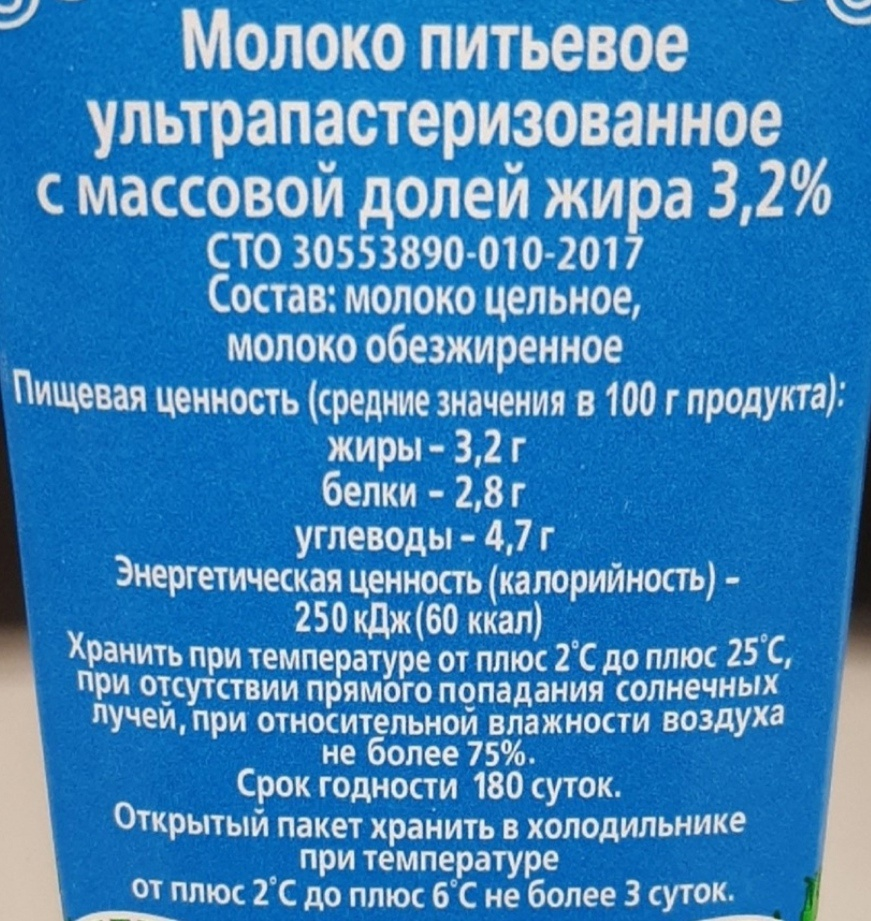

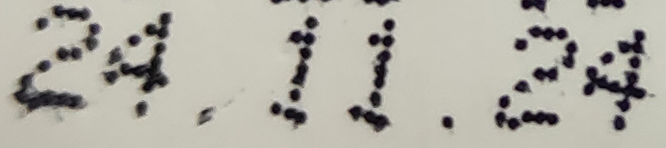

Текущая дата:  2024-04-14
Дата окончания срока годности:  2024-11-24
Дней до истечения срока годности:  224


1

In [281]:
image_milk_name="milk1.jpg"
image_date_name="milk1_2.png"
#image_date_name="milk1_6.jpg"
#image_date_name="milk1_7.jpg"
human_characteristics=[40, 153, 25, 1, 0]

image_milk =cv2.imread(image_milk_name)
cv2_imshow(image_milk)
image_date =cv2.imread(image_date_name)
cv2_imshow(image_date)

decision(image_milk_name, image_date_name, human_characteristics)